In [15]:
import feather
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
coulomb = feather.read_dataframe('../features/CoulombInteraction_train.feather')

In [3]:
coulomb.head()

,dist_sq_inv__1C_x,dist_sq_inv__2C_x,dist_sq_inv__3C_x,dist_sq_inv__4C_x,dist_sq_inv__5C_x,dist_sq_inv__1F_x,dist_sq_inv__2F_x,dist_sq_inv__3F_x,dist_sq_inv__4F_x,dist_sq_inv__5F_x,...,dist_sq_inv__1N_y,dist_sq_inv__2N_y,dist_sq_inv__3N_y,dist_sq_inv__4N_y,dist_sq_inv__5N_y,dist_sq_inv__1O_y,dist_sq_inv__2O_y,dist_sq_inv__3O_y,dist_sq_inv__4O_y,dist_sq_inv__5O_y
0,0.838672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.838674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.838682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.838680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.838672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
coulomb.fillna(0).head()

,dist_sq_inv__1C_x,dist_sq_inv__2C_x,dist_sq_inv__3C_x,dist_sq_inv__4C_x,dist_sq_inv__5C_x,dist_sq_inv__1F_x,dist_sq_inv__2F_x,dist_sq_inv__3F_x,dist_sq_inv__4F_x,dist_sq_inv__5F_x,...,dist_sq_inv__1N_y,dist_sq_inv__2N_y,dist_sq_inv__3N_y,dist_sq_inv__4N_y,dist_sq_inv__5N_y,dist_sq_inv__1O_y,dist_sq_inv__2O_y,dist_sq_inv__3O_y,dist_sq_inv__4O_y,dist_sq_inv__5O_y
0,0.838672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.838674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.838682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.838680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.838672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
oof = feather.read_dataframe('../features/ScalarCouplingContributionsOof_train.feather')

In [6]:
oof.head()

,fc,sd,pso,dso
0,82.644941,0.189357,0.856272,0.465970
1,-10.347675,0.363358,2.725744,-2.897002
2,-10.771037,0.372108,2.576495,-2.857371
3,-10.953115,0.368697,2.628033,-2.867212
4,80.794899,0.186046,0.827075,0.469087


In [2]:
train = feather.read_dataframe('../data/input/train.feather')

In [3]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
train_type = train['type'].values

In [7]:
uniq_type = np.unique(train_type)

In [8]:
uniq_type

array(['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype=object)

In [9]:
train_type[train_type == uniq_type[0]]

array(['1JHC', '1JHC', '1JHC', ..., '1JHC', '1JHC', '1JHC'], dtype=object)

In [13]:
idx_0 = (train_type == uniq_type[0])

In [14]:
train.iloc[idx_0]

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095
17,17,dsgdb9nsd_000005,2,0,1JHC,171.2200
19,19,dsgdb9nsd_000007,2,0,1JHC,83.5429
26,26,dsgdb9nsd_000007,3,0,1JHC,83.5417
32,32,dsgdb9nsd_000007,4,0,1JHC,83.5484
38,38,dsgdb9nsd_000007,5,1,1JHC,83.5418
42,42,dsgdb9nsd_000007,6,1,1JHC,83.5430


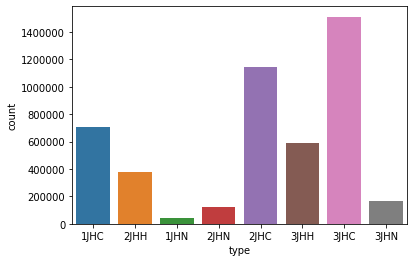

In [16]:
sns.countplot(train['type'])

In [17]:
for i in uniq_type:
    print(i)

1JHC
1JHN
2JHC
2JHH
2JHN
3JHC
3JHH
3JHN
